In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os

In [2]:
path = r"C:\Users\harip\Instacart Basket Analysis"

In [3]:
# Import orders_products_merged
df_order_products_merged =  pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','orders_products_merged.pkl'))

In [4]:
# Creating a subset for first 1Million rows
df = df_order_products_merged[:1000000]

In [5]:
df.shape

(1000000, 14)

# Using IF statements

In [6]:
#Define price label function
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [7]:
# Apply price label on dataframe
df['price_range'] = df.apply(price_label, axis=1)

C:\Users\harip\AppData\Local\Temp\ipykernel_9572\2213225355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [8]:
df['price_range'].value_counts(dropna = False)

Mid-range product    652638
Low-range product    338018
High range             9344
Name: price_range, dtype: int64

In [9]:
# Check max price to confirm
df['prices'].max()

24.5

# If statements with the loc()

In [10]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

C:\Users\harip\AppData\Local\Temp\ipykernel_9572\1169838859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'


In [11]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [12]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [13]:
# Check value counts
df['price_range_loc'].value_counts(dropna = False)

Mid-range product     652638
Low-range product     338018
High-range product      9344
Name: price_range_loc, dtype: int64

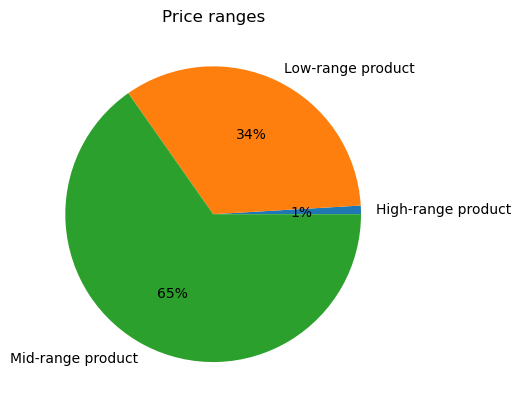

In [14]:
#Creating a pie chart of 'price_ranges'
pie_1 = df['price_range_loc'].value_counts().sort_index().plot.pie( title = 'Price ranges' , label ='' , autopct=('%1.f%%'))

In [15]:
#Exporting pie chart
pie_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_ranges.png'))

# Repeating the loc() function on the entire process

In [16]:
df_order_products_merged.loc[df_order_products_merged['prices'] > 15, ' price_range_loc'] = 'High-range product'

In [17]:
df_order_products_merged.loc[(df_order_products_merged['prices'] <= 15) & (df_order_products_merged['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [18]:
df_order_products_merged.loc[df_order_products_merged['prices'] < 5, 'price_range_loc'] = "Low-range product"

In [19]:
# Check value counts
df_order_products_merged['price_range_loc'].value_counts(dropna = False)

Mid-range product    21861558
Low-range product     9904846
NaN                    638455
Name: price_range_loc, dtype: int64

In [20]:
#Checking for the value points for orders_day_of_week
df_order_products_merged['orders_day_of_week'].value_counts(dropna= False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [21]:
result = []

for value in df_order_products_merged["orders_day_of_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [22]:
result

['Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Busiest day',
 'Least busy',
 'Busiest day',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Bus

In [23]:
df_order_products_merged['busiest_day'] = result

In [24]:
df_order_products_merged['busiest_day'].value_counts (dropna = False)

Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: busiest_day, dtype: int64

# New column for the busiest and the least days

In [25]:
result_2 = []

for value in df_order_products_merged["orders_day_of_week"]:
  if value == 0 or value == 1:
    result_2.append("Busiest days")
  elif value == 4 or value == 3:
    result_2.append("Least busy days")
  else:
    result_2.append("Regularly busy")

In [26]:
# Adding the result to dataframe
df_order_products_merged['Busiest_days'] = result_2 

In [27]:
df_order_products_merged['Busiest_days'].value_counts (dropna = False)

Regularly busy     12916111
Busiest days       11864412
Least busy days     7624336
Name: Busiest_days, dtype: int64

In [28]:
#Checking the new column
df_order_products_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,orders_timing_in_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,price_range_loc,busiest_day,Busiest_days
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,NaN,Mid-range product,Regularly busy,Regularly busy
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,NaN,Mid-range product,Regularly busy,Regularly busy
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,both,NaN,Mid-range product,Busiest day,Busiest days
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,10,0,both,NaN,Mid-range product,Regularly busy,Least busy days
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,both,NaN,Mid-range product,Least busy,Least busy days


# Checking values for the busiest_days column

In [29]:
df_order_products_merged['Busiest_days'].value_counts(dropna = False)

Regularly busy     12916111
Busiest days       11864412
Least busy days     7624336
Name: Busiest_days, dtype: int64

While comparing this values with the values obtained for the column busiest days it has increased as the busiest days contains values from 0 and 1, least days contains values from 4 and 3 this shows the loop is done correctly.

# Finding busiest period of the day

In [30]:
#Checking for the value points for orders timing in day
df_order_products_merged['orders_timing_in_day'].value_counts(dropna= False)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: orders_timing_in_day, dtype: int64

In [31]:
# Creating a loop statement
Busiest_hour_of_day = []

for value in df_order_products_merged["orders_timing_in_day"]:
  if value in [10, 11, 14, 15, 13, 12, 16, 9]:
    Busiest_hour_of_day.append("Most orders")
  elif value in [23, 6, 0, 1, 5, 2, 4, 3]:
    Busiest_hour_of_day.append("Fewest orders")
  else:
    Busiest_hour_of_day.append("Average orders")


As we had 24 records on total I categorised the first 8 records as the "Most orders" , the last 8 records as"Fewest orders" and the rest as "average orders".

In [32]:
# Adding the result to dataframe
df_order_products_merged['Busiest_period_of_day'] = Busiest_hour_of_day

In [33]:
# Printing the frequency for busiest period of day
df_order_products_merged['Busiest_period_of_day'].value_counts(dropna = False)

Most orders       21118071
Average orders     9997651
Fewest orders      1289137
Name: Busiest_period_of_day, dtype: int64

In [34]:
#Checking the new columns
df_order_products_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,orders_timing_in_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,price_range_loc,busiest_day,Busiest_days,Busiest_period_of_day
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,NaN,Mid-range product,Regularly busy,Regularly busy,Average orders
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,both,NaN,Mid-range product,Busiest day,Busiest days,Average orders
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,10,0,both,NaN,Mid-range product,Regularly busy,Least busy days,Most orders
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,both,NaN,Mid-range product,Least busy,Least busy days,Average orders


# Exporting the file

In [35]:
df_order_products_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged_1.pkl'))